# Introduction to Linear Regression
*Adapted from Chapter 3 of An Introduction to Statistical Learning*
https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb

## Motivation
**Regresson problems** are supervised learning problems in which the response is continous. **Classification problems** are supervised learning problems in which the response is categorical. **Linear Regression** is a technique that is useful for regression problems.

So, why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries
We'll be using **Statsmodels** for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on **scikit-learn** since it provides significantly more useful functionality for machine learning in general

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

# Example: Advertising Data
Let's take a look at some data ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read the data into DataFrame
data = pd.read_csv('C:/Users/Van/Desktop/Python/ml_python_2019/Data_school_Introduction_to_sckit_learn/Advertising.csv',
                  index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- Tv: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- radio: advertising dollars spents on radio
- newspapers: advertising dollars spents on newspapers

What is the **respones**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset

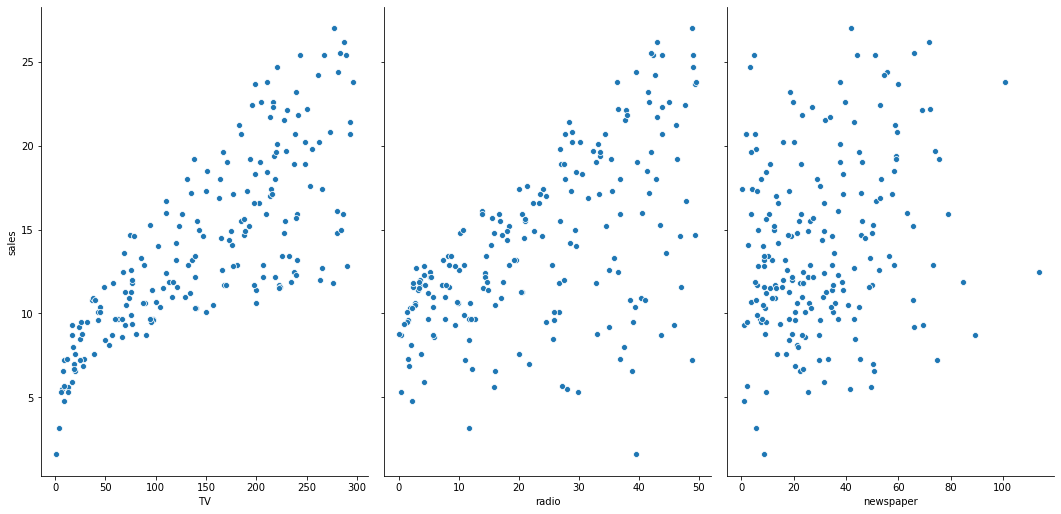

In [4]:
# visualize the relationship between the features and the response using scatterplot
# scatterplot shows how speadout the continous numbers are
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales', 
             height=7,aspect=0.7)

## Questions About the Advertising Data
let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

    1. Is there a relationship between ads and sales?
    2. How strong is that relationship?
    3. Which ad types contribute to sales?
    4. What is the effect of each ad type of sales?
    5. Given ad spending in a particular market, can sales be predicted?
    
We will explore these questions below!

## Simple Linear Regression
Simple linear regression is an approach for predicting a **quanitative respones** using a **single feature** (or "predict" or "input variable"). It takes the following form:

$ y =\beta_0 + \beta_1x_1$  

What does each term represent?
- $y$ is the respone
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x$

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are finding the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

What elements are present in the diagram?
- The black dots are the **observed values** of x and y
- The blue line is our **least squares line.**
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by the change of $x$)

Let's estimate the model coefficients for the advertising data:

In [5]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [6]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127693
[0.04753664]


## Interpreting Model Coefficients 
How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increse in TV ad spending is **associated with** a 0.04753 "unit" increase in sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increased on sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be negative.

## Using the Model for Predction
Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the sales in that markets?
$$ y = 7.032594 + 0.047537 x 50$$

In [7]:
# manually calculate the prediction
7.032594+0.047537*50

9.409444

In [8]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV':[50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [9]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(np.array(50).reshape(1,-1))

array([9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line
Let's plot the least squared line for Sales versus each of the features:

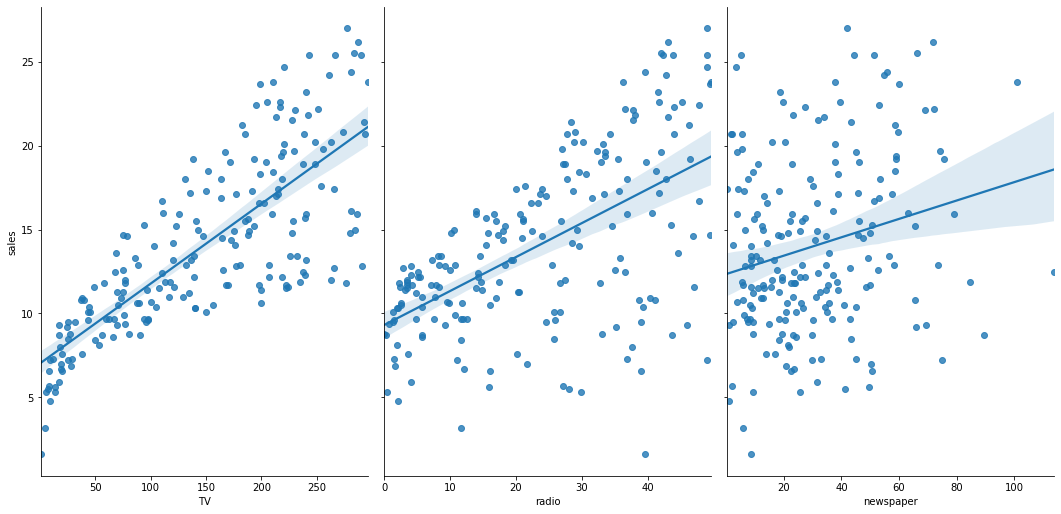

In [10]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',
            height=7, aspect=0.7,kind='reg')

## Confidence in our Model
**Question:** Is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer**: Low variance/high bias. Under repeated sampling, the line will stay roughly the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of trainig data!

A closely related concept is **Confidence intervals**. Satsmodels calculate 95% confidence intervals for our model conefficients, which are interpreted as follow: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [11]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population data**. The 'true' coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show incertainty about that estimate by giving a range that that coefficient is **probably** within.

Note that using 95% cofidence intervals is just convention. You can create 90% confidence intervals (which all be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you likes.

## Hypothesis Testing and p-values
closely, related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis**(that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failling to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data show that.)

- **null hypothesis**: There is no relationship between TV ads and Sales (and $\beta_0$ equals zero)
- **alternative hypothesis**: There is a relationship between TV ads and Sales(and thus $\beta_0$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null(and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [12]:
### STATSMODELS ###

# print the p-values for model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **include zero**, the p-value for that coefficient will be **greater than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as cutoff is just a convention)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales

Note that we generally ignore the p-value for the intercept.

## How well Does the Model Fit the data
The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observe data that is explained by the model, or the reduction of variance in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here is an example of what R-squared "looks like"

You can see that the **blue line** explains some of the variance in the data (R-squared = 0.54), the **green line** explains more of the variance (R-squared = 0.64), and the **red line** fits the training data even further (R-squared=0.66). Does the redline look like overfitting?

In [13]:
### STATSMODEL ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [14]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X,y)

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **compairing different models**

## Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features.This is called **multiple linear regression**:

$ y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$ y = \beta_0 + \beta_1 x TV + \beta_2 x Radio + \beta_3 x Newspaper$

Let's estimate these coefficients:

In [15]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [19]:
### SCIKI-LEARN ###

# create X and y
X = data[['TV', 'radio', 'newspaper']]
y = data.sales

# instantate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [23]:
# pair the feature names with the coefficients
list(zip(['TV', 'radio', 'newspaper'],lm2.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.756 widgets**

A lot if the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [24]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        09:33:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?
- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those feature and Sales), and fail to rejet the null hypthesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negative associated** with Sales. (However, this is irrelavent since we have failed to reject the null hypo thesis for Newspaper)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection
How do I decide **which features to include** in a linear model? Here's one idea:

- Try different models, and only keep features in the model if they have small p-values
- Check whether the R-squared value goes up when you add new features.

What are the **drawbacks** to this approach?

- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- USing a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be conunted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guaranteee that a model with a high R-squared value will generalize. Below is an example:

In [25]:
### STATSMODELS ###

# only include TV and Radio in the model
lm1 = smf.ols(formula = 'sales~ TV + radio', data=data).fit()
lm1.rsquared

0.8971942610828957

In [26]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula = 'sales~ TV + radio + newspaper', data=data).fit()
lm1.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they ate unrelated to the response. THus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfittng), but it generally **under-penalizes complexity**.

So is there a better approach to feature selection? **Train/test split** or **cross-validation**. They provide a more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to **any model**, whereas the methods described above only apply to **linear models**

In [27]:
# define true and predicted response values
y_true = [100,50,30,20]
y_pred = [90,50,50,30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_pred,y_true))
print(metrics.mean_squared_error(y_pred,y_true))
print(np.sqrt(metrics.mean_squared_error(y_pred,y_true)))

10.0
150.0
12.24744871391589


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" unit

## Model Evaluation Using Train\Test Split
Let's use train\test split with RMSE to see whether Newspaper should be kept in the model:

In [29]:
# include Newspaper
X = data[['TV','radio','newspaper']]
y = data.sales

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

1.4046514230328955


In [30]:
# exclude Newspaper
X = data[['TV','radio']]
y = data.sales

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

1.3879034699382888


## Handling Categorical Features with Two Categories
Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [32]:
# Set a seed for reproducibility (ham seed se generate cung 1 bo so random)
np.random.seed(12345)

# create a Series of booleans in which roughly half are True 
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large 
data['Size'] = 'small'
data.loc[mask_large,'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [39]:
# create a new Series called Size_large
data['Size_large'] = data['Size'].map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **Size_large** feature:

In [42]:
# create X and y
X = data[['TV','radio','newspaper','Size_large']]
y = data.sales

# instantate, fit
lm2 = LinearRegression()
lm2.fit(X,y)

# print coefficients
list(zip(['TV','radio','newspaper','Size_large'],lm2.coef_))

[('TV', 0.045719820924362775),
 ('radio', 0.1887281431342787),
 ('newspaper', -0.0010976794483516079),
 ('Size_large', 0.0574238508548277)]